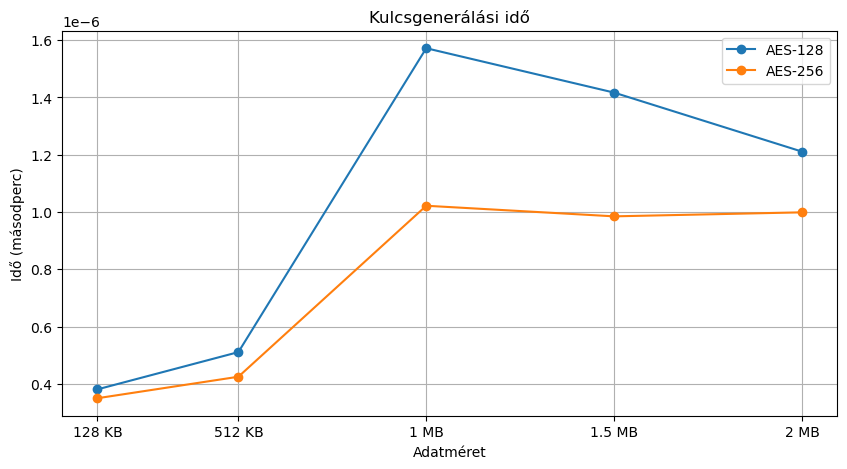

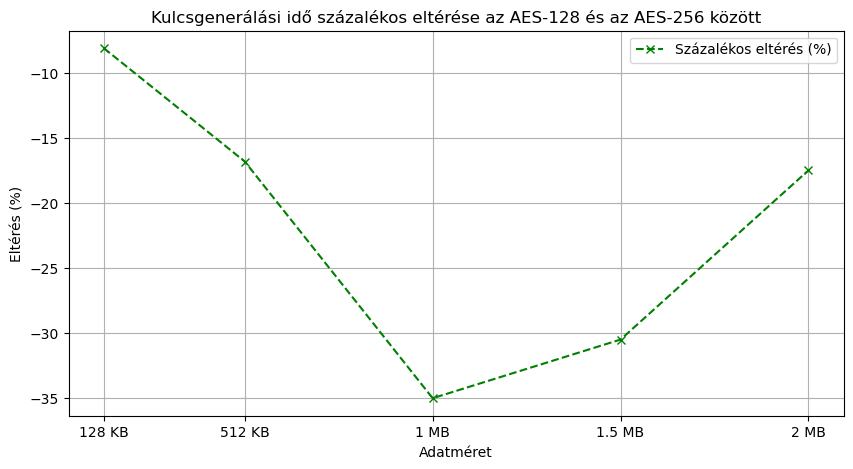

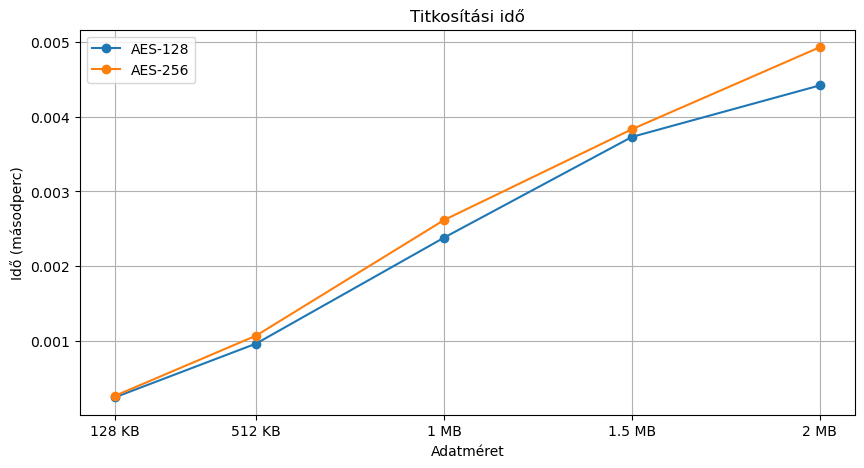

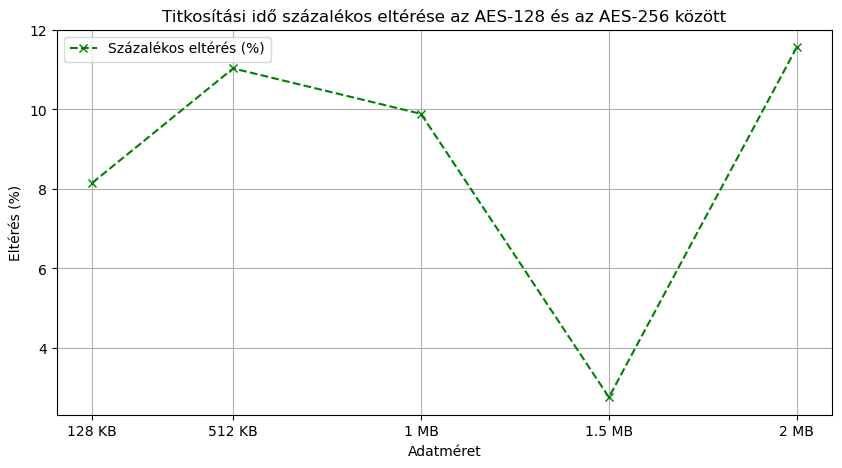

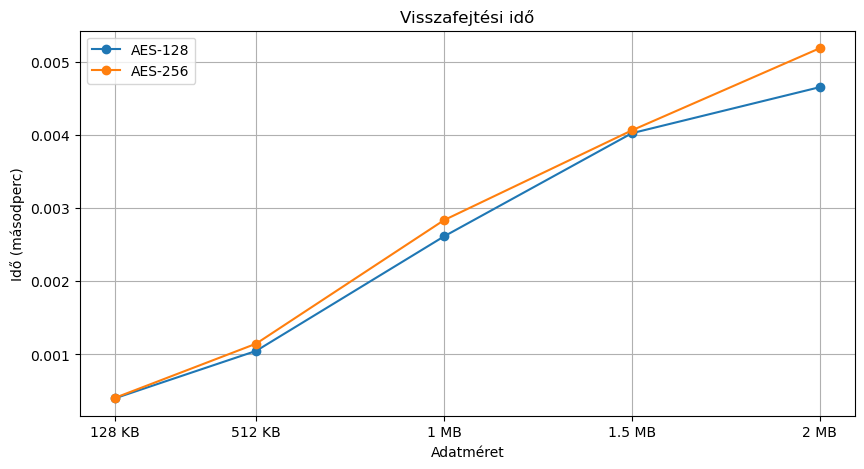

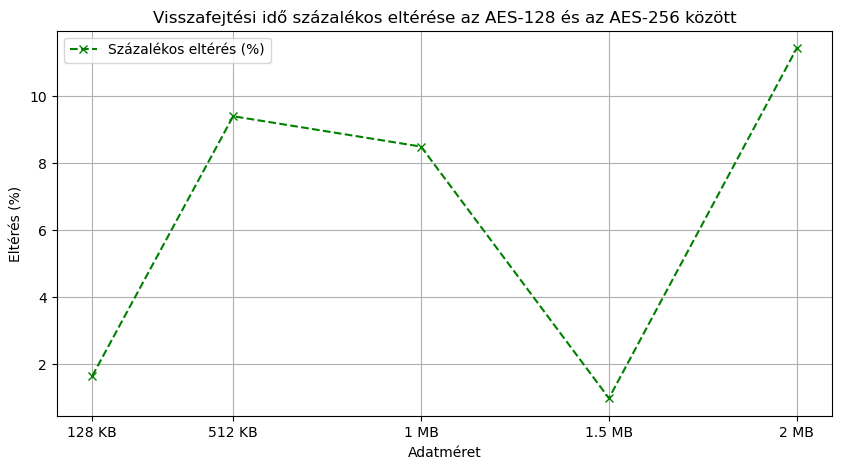

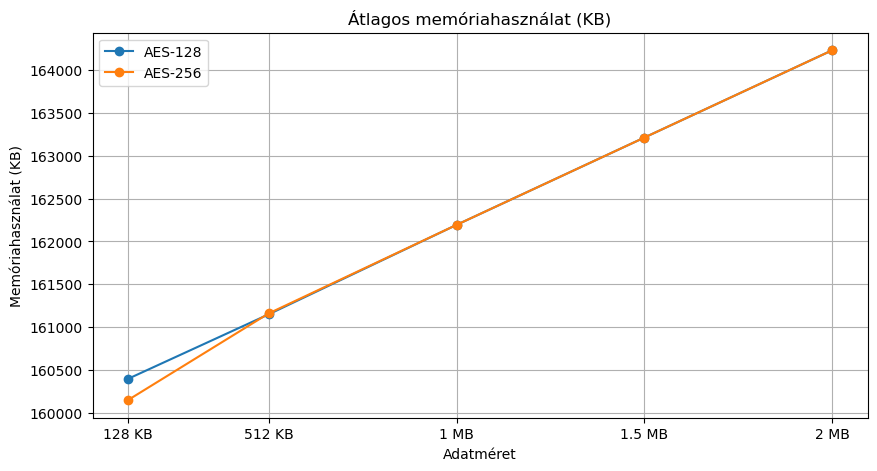

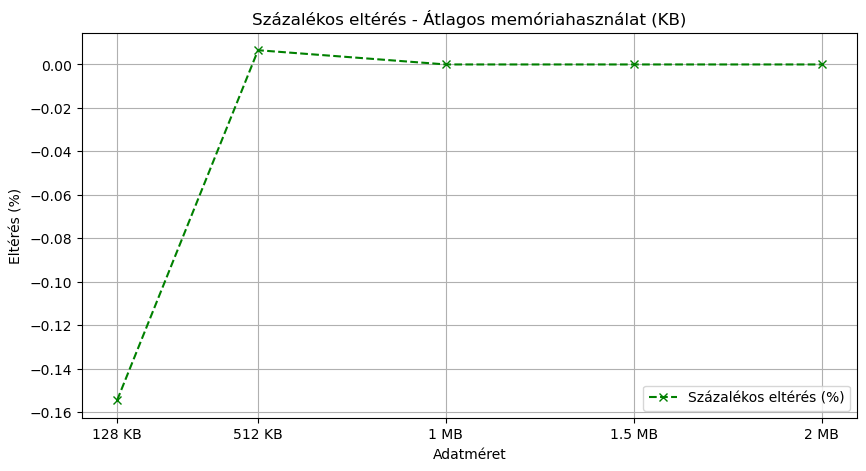

In [35]:
#!pip install pycryptodome psutil matplotlib

from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
import time
import psutil
import matplotlib.pyplot as plt

# Diagramcímek szótára
diagram_cimek = {
    "kulcsgeneralas_ido": "Kulcsgenerálási idő",
    "titkositas_ido": "Titkosítási idő",
    "visszafejtes_ido": "Visszafejtési idő",
    "atlagos_memoria": "Átlagos memóriahasználat (KB)",
    "titkositas_ido_eltérés": "Titkosítási idő százalékos eltérése az AES-128 és az AES-256 között",
    "visszafejtes_ido_eltérés": "Visszafejtési idő százalékos eltérése az AES-128 és az AES-256 között",
    "kulcsgeneralas_ido_eltérés": "Kulcsgenerálási idő százalékos eltérése az AES-128 és az AES-256 között",
}

# AES szimuláció
def aes_simulacio(kulcs_meret, adat_meret, ismetlesek_szama=100):
    titkositas_idok = []
    visszafejtes_idok = []
    kulcsgeneralas_idok = []
    memoria_hasznalat = []

    for _ in range(ismetlesek_szama):
        # Adat generálása
        uzenet = get_random_bytes(adat_meret)  # Adat mérete byte-ban

        # Kulcsgenerálási idő mérése
        start_time = time.perf_counter()
        kulcs = get_random_bytes(kulcs_meret // 8)  # Kulcs byte méretben
        kulcsgeneralas_idok.append(time.perf_counter() - start_time)

        # Titkosítás előkészítése
        cipher = AES.new(kulcs, AES.MODE_EAX)

        # Memóriahasználat mérése
        memoria_hasznalat.append(psutil.Process().memory_info().rss)

        # Titkosítási idő mérése
        start_time = time.perf_counter()
        ciphertext, tag = cipher.encrypt_and_digest(uzenet)
        titkositas_idok.append(time.perf_counter() - start_time)

        # Visszafejtési idő mérése
        start_time = time.perf_counter()
        decipher = AES.new(kulcs, AES.MODE_EAX, nonce=cipher.nonce)
        decipher.decrypt_and_verify(ciphertext, tag)
        visszafejtes_idok.append(time.perf_counter() - start_time)

    return {
        "kulcsgeneralas_ido": sum(kulcsgeneralas_idok) / ismetlesek_szama,
        "titkositas_ido": sum(titkositas_idok) / ismetlesek_szama,
        "visszafejtes_ido": sum(visszafejtes_idok) / ismetlesek_szama,
        "atlagos_memoria": sum(memoria_hasznalat) / ismetlesek_szama,
    }

# Eredmények gyűjtése
def eredmenyek_gyujtese(adatmeretek, ismetlesek_szama=100):
    eredmenyek = {"AES-128": [], "AES-256": []}
    for kulcs_meret in [128, 256]:
        for adat_meret in adatmeretek:
            eredmeny = aes_simulacio(kulcs_meret, adat_meret, ismetlesek_szama=ismetlesek_szama)
            eredmenyek[f"AES-{kulcs_meret}"].append(eredmeny)
    return eredmenyek

# Százalékos eltérés kiszámítása
def szazalekos_elteres(eredmenyek, mutato):
    elteresek = []
    for i in range(len(eredmenyek["AES-128"])):
        aes_128_ertek = eredmenyek["AES-128"][i][mutato]
        aes_256_ertek = eredmenyek["AES-256"][i][mutato]
        elteres = ((aes_256_ertek - aes_128_ertek) / aes_128_ertek) * 100
        elteresek.append(elteres)
    return elteresek

# Grafikonok megjelenítése
def grafikon_megjelenitese(adatmeretek, eredmenyek, cimkek):
    for mutato in ["kulcsgeneralas_ido", "titkositas_ido", "visszafejtes_ido", "atlagos_memoria"]:
        # Értékek grafikonja
        plt.figure(figsize=(10, 5))
        for tipus, adatok in eredmenyek.items():
            mutato_ertekek = [adat[mutato] for adat in adatok]
            if mutato == "atlagos_memoria":
                mutato_ertekek = [ertek / 1024 for ertek in mutato_ertekek]  # KB-re konvertálás
            plt.plot(adatmeretek, mutato_ertekek, label=f"{tipus}", marker="o")
        plt.xticks(adatmeretek, cimkek)
        plt.xlabel("Adatméret")
        plt.ylabel("Idő (másodperc)" if mutato != "atlagos_memoria" else "Memóriahasználat (KB)")
        plt.title(diagram_cimek[mutato])
        plt.legend()
        plt.grid(True)
        plt.show()

        # Százalékos eltérés grafikonja
        elteresek = szazalekos_elteres(eredmenyek, mutato)
        plt.figure(figsize=(10, 5))
        plt.plot(adatmeretek, elteresek, label="Százalékos eltérés (%)", marker="x", linestyle="--", color="green")
        plt.xticks(adatmeretek, cimkek)
        plt.xlabel("Adatméret")
        plt.ylabel("Eltérés (%)")
        if mutato in ["titkositas_ido", "visszafejtes_ido", "kulcsgeneralas_ido"]:
            plt.title(diagram_cimek[f"{mutato}_eltérés"])
        else:
            plt.title(f"Százalékos eltérés - {diagram_cimek[mutato]}")
        plt.legend()
        plt.grid(True)
        plt.show()

# Új adatméretek az x tengelyen
adatmeretek = [
    128 * 1024,  # 128 KB
    512 * 1024,  # 512 KB
    1 * 1024 * 1024,  # 1 MB
    int(1.5 * 1024 * 1024),  # 1.5 MB
    2 * 1024 * 1024,  # 2 MB
]
adat_cimkek = ["128 KB", "512 KB", "1 MB", "1.5 MB", "2 MB"]

# Eredmények gyűjtése és megjelenítése 100 ismétléssel
eredmenyek = eredmenyek_gyujtese(adatmeretek, ismetlesek_szama=100)
grafikon_megjelenitese(adatmeretek, eredmenyek, adat_cimkek)


Kis adatméret tesztelése...


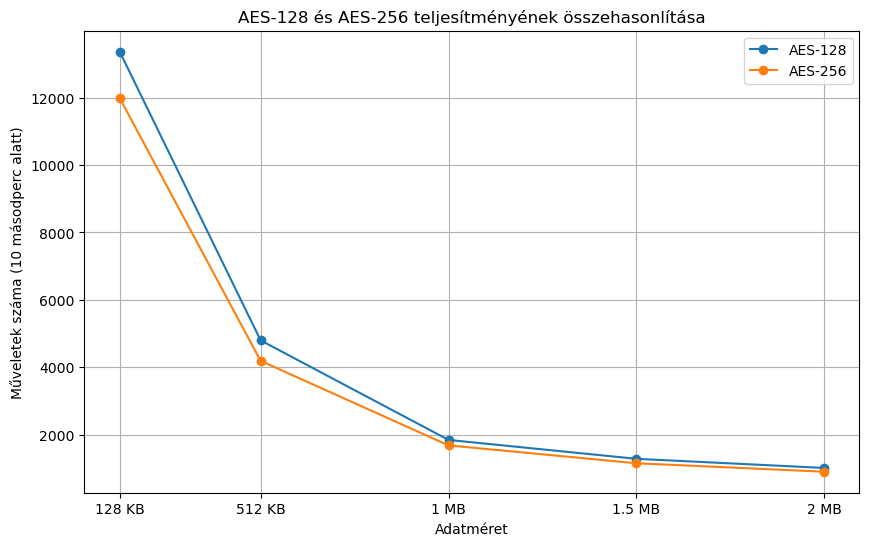

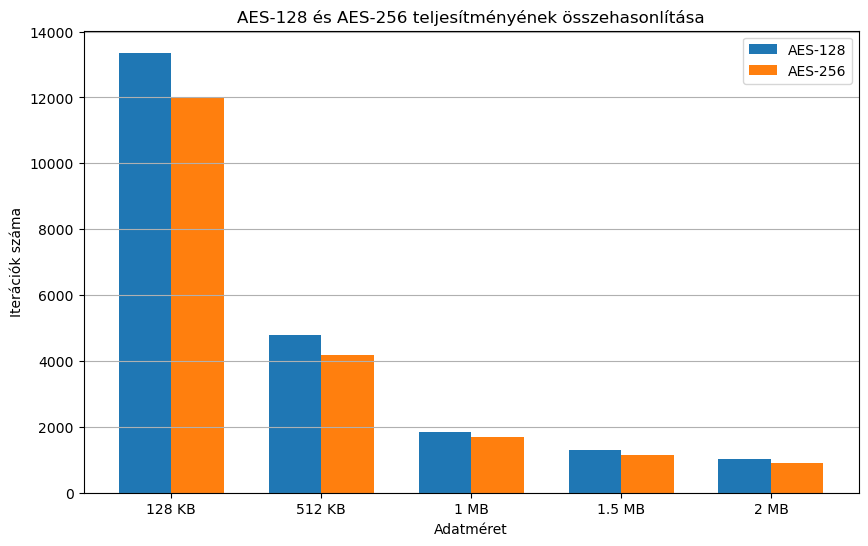


Százalékos eltérés az AES-256 és AES-128 között:
Adatméret: 128 KB - Eltérés: 10.31%
Adatméret: 512 KB - Eltérés: 12.67%
Adatméret: 1 MB - Eltérés: 8.77%
Adatméret: 1.5 MB - Eltérés: 10.26%
Adatméret: 2 MB - Eltérés: 11.02%
Nagy adatméret tesztelése...


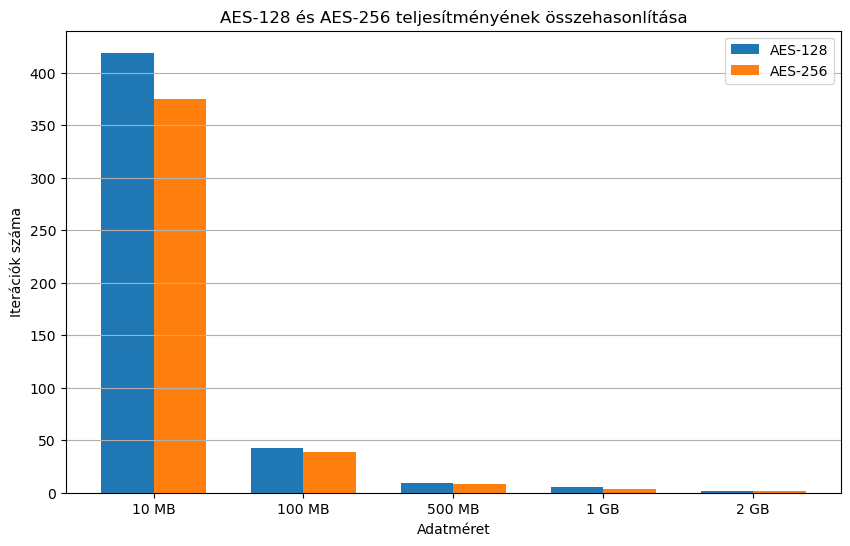


Százalékos eltérés az AES-256 és AES-128 között:
Adatméret: 10 MB - Eltérés: 10.50%
Adatméret: 100 MB - Eltérés: 9.30%
Adatméret: 500 MB - Eltérés: 11.11%
Adatméret: 1 GB - Eltérés: 20.00%
Adatméret: 2 GB - Eltérés: 0.00%


In [41]:
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
import time
import matplotlib.pyplot as plt

# AES szimuláció teljesítmény teszthez
def aes_teljesitmeny_teszt(kulcs_meret, adat_meret, ido=10):
    iteracios_szam = 0
    kezd_ido = time.perf_counter()

    while time.perf_counter() - kezd_ido < ido:
        uzenet = get_random_bytes(adat_meret)  # Adat generálása
        kulcs = get_random_bytes(kulcs_meret // 8)  # Kulcsgenerálás
        cipher = AES.new(kulcs, AES.MODE_EAX)  # Titkosítás előkészítése
        ciphertext, tag = cipher.encrypt_and_digest(uzenet)  # Titkosítás
        decipher = AES.new(kulcs, AES.MODE_EAX, nonce=cipher.nonce)  # Visszafejtés előkészítése
        decipher.decrypt_and_verify(ciphertext, tag)  # Visszafejtés
        iteracios_szam += 1

    return iteracios_szam

# Teljesítmény teszt adatok gyűjtése
def teljesitmeny_teszt_adatok(adatmeretek, ido):
    teljesitmeny = {"AES-128": [], "AES-256": []}
    for kulcs_meret in [128, 256]:
        for adat_meret in adatmeretek:
            iteracios_szam = aes_teljesitmeny_teszt(kulcs_meret, adat_meret, ido=ido)
            teljesitmeny[f"AES-{kulcs_meret}"].append(iteracios_szam)
    return teljesitmeny

# Százalékos eltérés kiszámítása és kiírása
def szazalekos_elteres_kiszamitasa(teljesitmeny, cimkek):
    print("\nSzázalékos eltérés az AES-256 és AES-128 között:")
    for i, cimke in enumerate(cimkek):
        aes_128_ertek = teljesitmeny["AES-128"][i]
        aes_256_ertek = teljesitmeny["AES-256"][i]
        elteres = ((aes_128_ertek - aes_256_ertek) / aes_128_ertek) * 100
        print(f"Adatméret: {cimke} - Eltérés: {elteres:.2f}%")
        
# Teljesítmény teszt eredmények megjelenítése vonaldiagramon
def teljesitmeny_teszt_grafikon(adatmeretek, teljesitmeny, cimkek):
    plt.figure(figsize=(10, 6))
    for tipus, iteracios_ertekek in teljesitmeny.items():
        plt.plot(adatmeretek, iteracios_ertekek, label=f"{tipus}", marker="o")
    plt.xticks(adatmeretek, cimkek)
    plt.xlabel("Adatméret")
    plt.ylabel("Műveletek száma (10 másodperc alatt)")
    plt.title("AES-128 és AES-256 teljesítményének összehasonlítása")
    plt.legend()
    plt.grid(True)
    plt.show()

# Teljesítmény teszt eredmények megjelenítése oszlopdiagramon
def teljesitmeny_teszt_oszlopdiagram(adatmeretek, teljesitmeny, cimkek):
    x = range(len(adatmeretek))
    width = 0.35

    plt.figure(figsize=(10, 6))
    for i, tipus in enumerate(teljesitmeny.keys()):
        offset = (i - 0.5) * width
        plt.bar([p + offset for p in x], teljesitmeny[tipus], width, label=tipus)
    plt.xticks(ticks=x, labels=cimkek)
    plt.xlabel("Adatméret")
    plt.ylabel("Iterációk száma")
    plt.title("AES-128 és AES-256 teljesítményének összehasonlítása")
    plt.legend()
    plt.grid(axis="y")
    plt.show()

# Nagy adatméretek tesztelése
def nagy_adatmeret_teszt():
    adatmeretek = [10 * 1024 * 1024, 100 * 1024 * 1024, 500 * 1024 * 1024, 1 * 1024 * 1024 * 1024, 2 * 1024 * 1024 * 1024]
    adat_cimkek = ["10 MB", "100 MB", "500 MB", "1 GB", "2 GB"]

    print("Nagy adatméret tesztelése...")
    teljesitmeny = teljesitmeny_teszt_adatok(adatmeretek, ido=20)
    teljesitmeny_teszt_oszlopdiagram(adatmeretek, teljesitmeny, adat_cimkek)
    szazalekos_elteres_kiszamitasa(teljesitmeny, adat_cimkek)

# Kis adatméretek tesztelése
def kis_adatmeret_teszt():
    adatmeretek = [128 * 1024, 512 * 1024, 1 * 1024 * 1024, int(1.5 * 1024 * 1024), 2 * 1024 * 1024]
    adat_cimkek = ["128 KB", "512 KB", "1 MB", "1.5 MB", "2 MB"]

    print("Kis adatméret tesztelése...")
    teljesitmeny = teljesitmeny_teszt_adatok(adatmeretek, ido=10)
    teljesitmeny_teszt_grafikon(adatmeretek, teljesitmeny, cimkek=adat_cimkek)
    teljesitmeny_teszt_oszlopdiagram(adatmeretek, teljesitmeny, cimkek=adat_cimkek)
    szazalekos_elteres_kiszamitasa(teljesitmeny, cimkek=adat_cimkek)

# Fő futtatás
if __name__ == "__main__":
    kis_adatmeret_teszt()
    nagy_adatmeret_teszt()



AES-128 Eredmények:
Adatméret: 100 MB
 - Átlagos kulcsgenerálási idő: 0.000007 másodperc
 - Átlagos titkosítási idő: 0.229461 másodperc
 - Átlagos visszafejtési idő: 0.209444 másodperc
 - Átlagos memóriahasználat: 259112.00 KB

Adatméret: 250 MB
 - Átlagos kulcsgenerálási idő: 0.000008 másodperc
 - Átlagos titkosítási idő: 0.548535 másodperc
 - Átlagos visszafejtési idő: 0.541169 másodperc
 - Átlagos memóriahasználat: 412724.00 KB

Adatméret: 500 MB
 - Átlagos kulcsgenerálási idő: 0.000006 másodperc
 - Átlagos titkosítási idő: 1.080979 másodperc
 - Átlagos visszafejtési idő: 1.054331 másodperc
 - Átlagos memóriahasználat: 668728.00 KB

Adatméret: 1 GB
 - Átlagos kulcsgenerálási idő: 0.000007 másodperc
 - Átlagos titkosítási idő: 2.115399 másodperc
 - Átlagos visszafejtési idő: 2.298450 másodperc
 - Átlagos memóriahasználat: 1205308.00 KB

Adatméret: 2 GB
 - Átlagos kulcsgenerálási idő: 0.000007 másodperc
 - Átlagos titkosítási idő: 4.431998 másodperc
 - Átlagos visszafejtési idő: 4.42

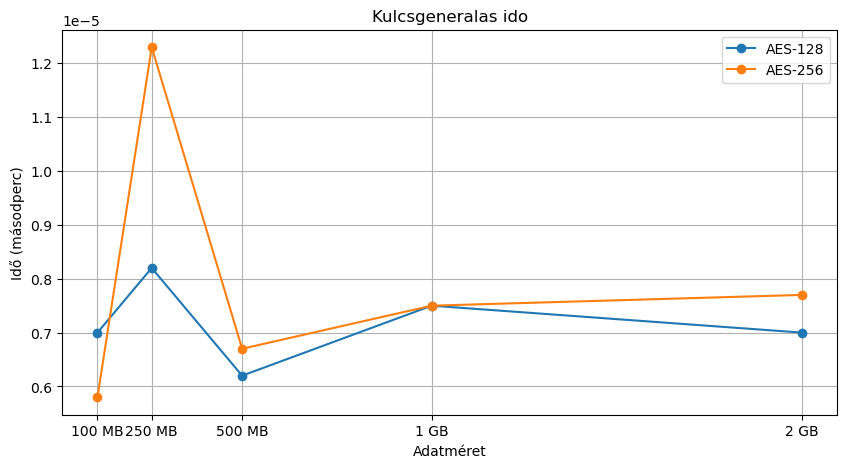

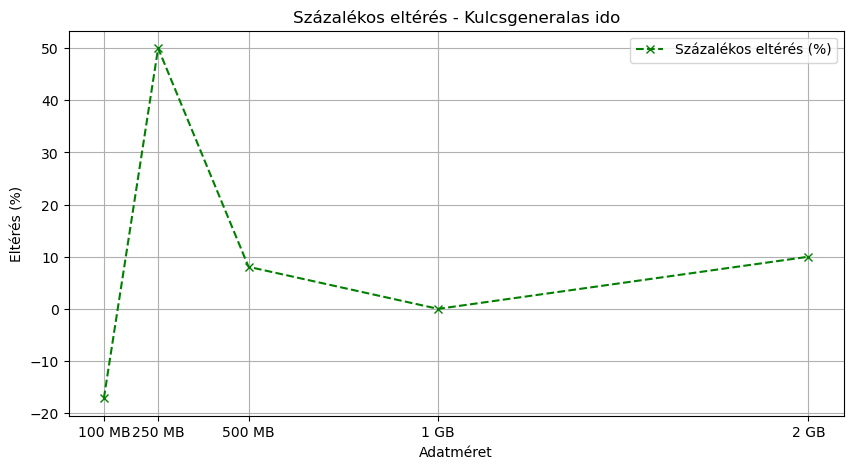


Kulcsgeneralas ido százalékos eltérései:
Adatméret: 100 MB, Eltérés: -17.14 %
Adatméret: 250 MB, Eltérés: 50.00 %
Adatméret: 500 MB, Eltérés: 8.06 %
Adatméret: 1 GB, Eltérés: 0.00 %
Adatméret: 2 GB, Eltérés: 10.00 %


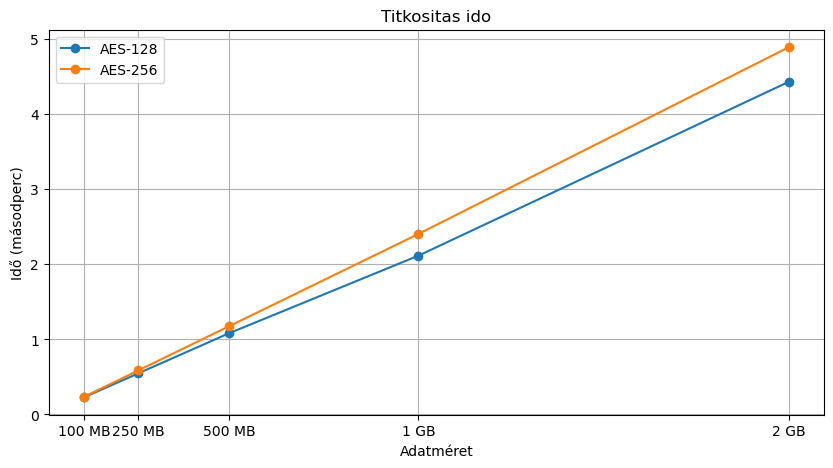

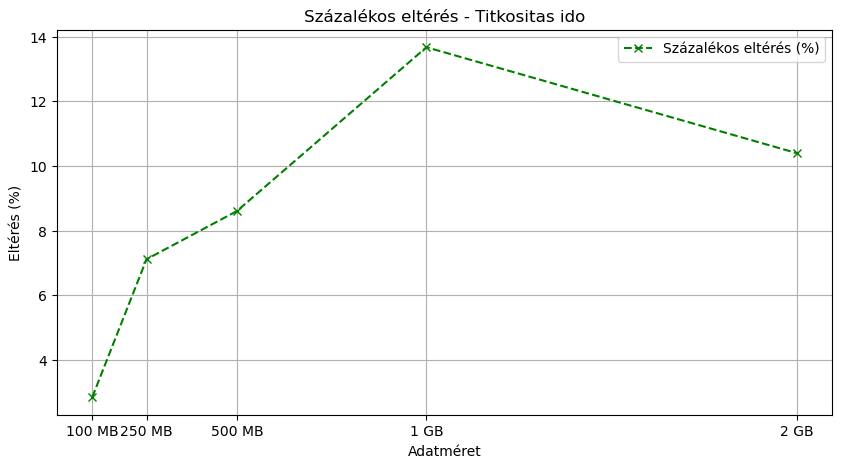


Titkositas ido százalékos eltérései:
Adatméret: 100 MB, Eltérés: 2.85 %
Adatméret: 250 MB, Eltérés: 7.12 %
Adatméret: 500 MB, Eltérés: 8.61 %
Adatméret: 1 GB, Eltérés: 13.67 %
Adatméret: 2 GB, Eltérés: 10.40 %


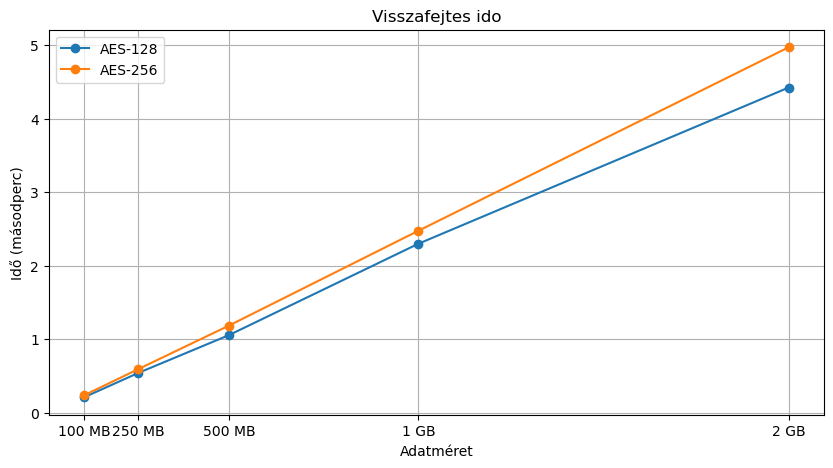

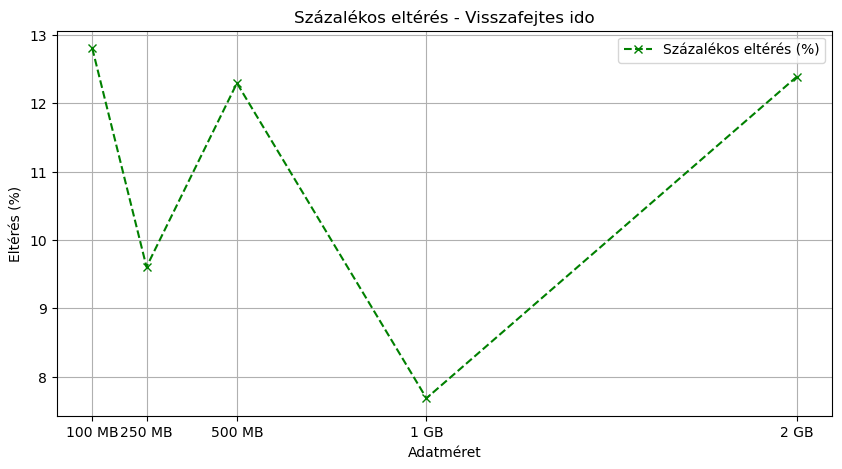


Visszafejtes ido százalékos eltérései:
Adatméret: 100 MB, Eltérés: 12.81 %
Adatméret: 250 MB, Eltérés: 9.61 %
Adatméret: 500 MB, Eltérés: 12.30 %
Adatméret: 1 GB, Eltérés: 7.69 %
Adatméret: 2 GB, Eltérés: 12.39 %


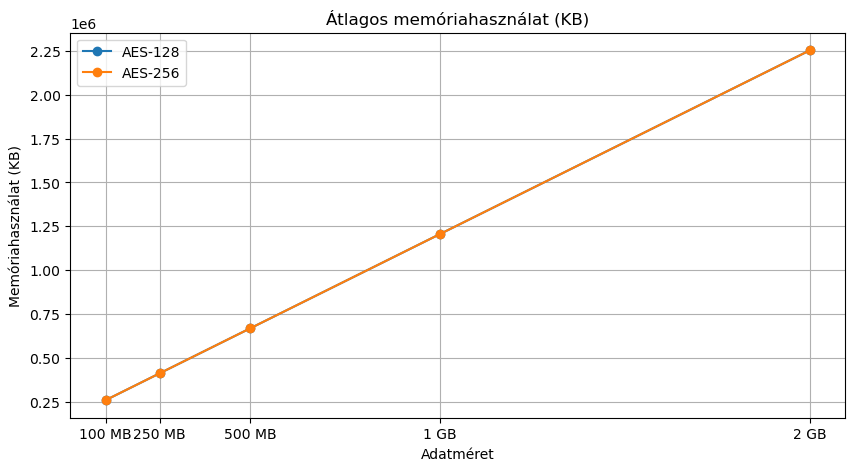

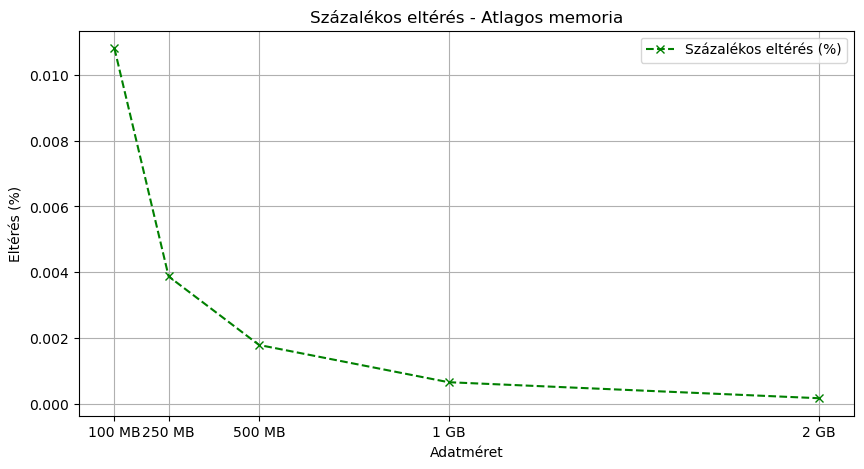


Atlagos memoria százalékos eltérései:
Adatméret: 100 MB, Eltérés: 0.01 %
Adatméret: 250 MB, Eltérés: 0.00 %
Adatméret: 500 MB, Eltérés: 0.00 %
Adatméret: 1 GB, Eltérés: 0.00 %
Adatméret: 2 GB, Eltérés: 0.00 %


In [71]:
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
import time
import psutil
import matplotlib.pyplot as plt

# AES szimuláció
def aes_simulacio(kulcs_meret, adat_meret, ismetlesek_szama=1):
    titkositas_idok = []
    visszafejtes_idok = []
    kulcsgeneralas_idok = []
    memoria_hasznalat = []

    for _ in range(ismetlesek_szama):
        # Adat generálása
        uzenet = get_random_bytes(adat_meret)  # Adat mérete byte-ban

        # Kulcsgenerálási idő mérése
        start_time = time.perf_counter()
        kulcs = get_random_bytes(kulcs_meret // 8)  # Kulcs byte méretben
        kulcsgeneralas_idok.append(time.perf_counter() - start_time)

        # Titkosítás előkészítése
        cipher = AES.new(kulcs, AES.MODE_EAX)

        # Memóriahasználat mérése
        memoria_hasznalat.append(psutil.Process().memory_info().rss)

        # Titkosítási idő mérése
        start_time = time.perf_counter()
        ciphertext, tag = cipher.encrypt_and_digest(uzenet)
        titkositas_idok.append(time.perf_counter() - start_time)

        # Visszafejtési idő mérése
        start_time = time.perf_counter()
        decipher = AES.new(kulcs, AES.MODE_EAX, nonce=cipher.nonce)
        decipher.decrypt_and_verify(ciphertext, tag)
        visszafejtes_idok.append(time.perf_counter() - start_time)

    return {
        "kulcsgeneralas_ido": sum(kulcsgeneralas_idok) / ismetlesek_szama,
        "titkositas_ido": sum(titkositas_idok) / ismetlesek_szama,
        "visszafejtes_ido": sum(visszafejtes_idok) / ismetlesek_szama,
        "atlagos_memoria": sum(memoria_hasznalat) / ismetlesek_szama,
    }

# Eredmények gyűjtése
def eredmenyek_gyujtese(adatmeretek):
    eredmenyek = {"AES-128": [], "AES-256": []}
    for kulcs_meret in [128, 256]:
        for adat_meret in adatmeretek:
            eredmeny = aes_simulacio(kulcs_meret, adat_meret)
            eredmenyek[f"AES-{kulcs_meret}"].append(eredmeny)
    return eredmenyek

# Százalékos eltérés kiszámítása
def szazalekos_elteres(eredmenyek, mutato):
    elteresek = []
    for i in range(len(eredmenyek["AES-128"])):
        aes_128_ertek = eredmenyek["AES-128"][i][mutato]
        aes_256_ertek = eredmenyek["AES-256"][i][mutato]
        elteres = ((aes_256_ertek - aes_128_ertek) / aes_128_ertek) * 100
        elteresek.append(elteres)
    return elteresek

# Eredmények kiírása
def eredmenyek_kiirasa(eredmenyek, adatmeretek, cimkek):
    for tipus, adatok in eredmenyek.items():
        print(f"\n{tipus} Eredmények:")
        for i, eredmeny in enumerate(adatok):
            print(
                f"Adatméret: {cimkek[i]}\n"
                f" - Átlagos kulcsgenerálási idő: {eredmeny['kulcsgeneralas_ido']:.6f} másodperc\n"
                f" - Átlagos titkosítási idő: {eredmeny['titkositas_ido']:.6f} másodperc\n"
                f" - Átlagos visszafejtési idő: {eredmeny['visszafejtes_ido']:.6f} másodperc\n"
                f" - Átlagos memóriahasználat: {eredmeny['atlagos_memoria'] / 1024:.2f} KB\n"
            )

# Grafikonok megjelenítése
def grafikon_megjelenitese(adatmeretek, eredmenyek, cimkek):
    for mutato in ["kulcsgeneralas_ido", "titkositas_ido", "visszafejtes_ido", "atlagos_memoria"]:
        # Értékek grafikonja
        plt.figure(figsize=(10, 5))
        for tipus, adatok in eredmenyek.items():
            mutato_ertekek = [adat[mutato] for adat in adatok]
            if mutato == "atlagos_memoria":
                mutato_ertekek = [ertek / 1024 for ertek in mutato_ertekek]  # KB-re konvertálás
            plt.plot(adatmeretek, mutato_ertekek, label=f"{tipus}", marker="o")
        plt.xticks(adatmeretek, cimkek)
        plt.xlabel("Adatméret")
        if mutato == "atlagos_memoria":
            plt.ylabel("Memóriahasználat (KB)")
            plt.title("Átlagos memóriahasználat (KB)")
        else:
            plt.ylabel("Idő (másodperc)")
            plt.title(mutato.replace("_", " ").capitalize())
        plt.legend()
        plt.grid(True)
        plt.show()

        # Százalékos eltérés grafikonja
        elteresek = szazalekos_elteres(eredmenyek, mutato)
        plt.figure(figsize=(10, 5))
        plt.plot(adatmeretek, elteresek, label="Százalékos eltérés (%)", marker="x", linestyle="--", color="green")
        plt.xticks(adatmeretek, cimkek)
        plt.xlabel("Adatméret")
        plt.ylabel("Eltérés (%)")
        plt.title(f"Százalékos eltérés - {mutato.replace('_', ' ').capitalize()}")
        plt.legend()
        plt.grid(True)
        plt.show()

        # Szövegesen kiírja a százalékos eltéréseket
        print(f"\n{mutato.replace('_', ' ').capitalize()} százalékos eltérései:")
        for i, elteres in enumerate(elteresek):
            print(f"Adatméret: {cimkek[i]}, Eltérés: {elteres:.2f} %")
            
# Adatméretek az x tengelyen
adatmeretek = [
    100 * 1024 * 1024,  # 500 MB
    250 * 1024 * 1024,  # 500 MB
    500 * 1024 * 1024,  # 500 MB
    1 * 1024 * 1024 * 1024,  # 1 GB
    2 * 1024 * 1024 * 1024,  # 2 GB
   
]
adat_cimkek = ["100 MB","250 MB","500 MB", "1 GB", "2 GB"]

# Eredmények gyűjtése és megjelenítése
eredmenyek = eredmenyek_gyujtese(adatmeretek)
eredmenyek_kiirasa(eredmenyek, adatmeretek, adat_cimkek)
grafikon_megjelenitese(adatmeretek, eredmenyek, adat_cimkek)


In [23]:
!pip install matplotlib
!pip install psutil
!pip install pycryptodome

Note: you may need to restart the kernel to use updated packages.
